In [47]:
!pip3 install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df = pd.read_csv("./data/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.duplicated().sum()

763

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(3577, 8)

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [10]:
df["name"].value_counts()

name
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: count, Length: 1491, dtype: int64

In [11]:
df["fuel"].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [12]:
df["seller_type"].value_counts()

seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [13]:
df["transmission"].value_counts()

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

In [14]:
df["owner"].value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

<Axes: xlabel='selling_price', ylabel='km_driven'>

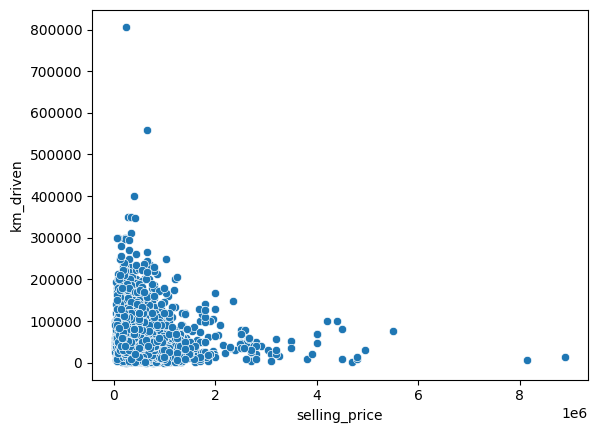

In [15]:
sns.scatterplot(df,x="selling_price",y="km_driven")

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fuel', ylabel='selling_price'>

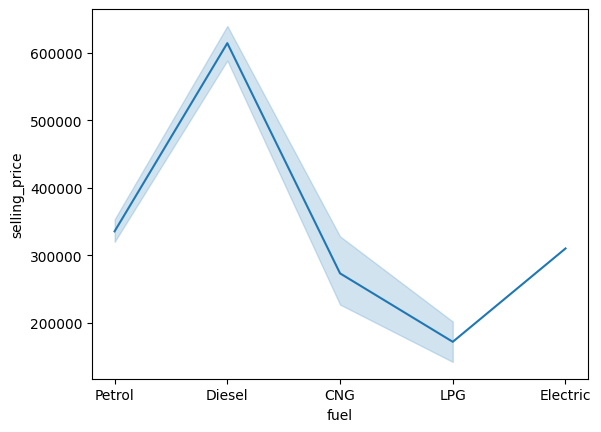

In [16]:
sns.lineplot(df,x="fuel" , y="selling_price")

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='selling_price', ylabel='Density'>

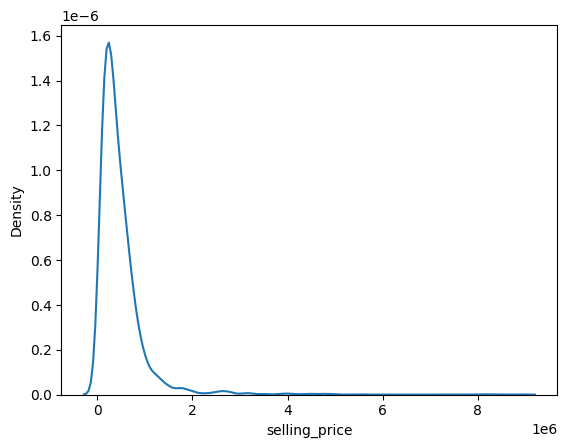

In [17]:
sns.kdeplot(df, x="selling_price")

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='km_driven', ylabel='Density'>

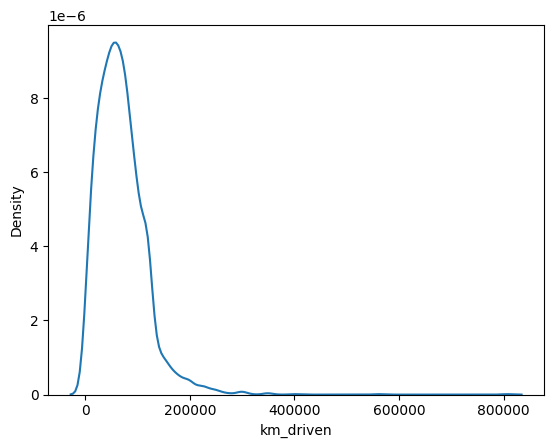

In [18]:
sns.kdeplot(df, x="km_driven")

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Density'>

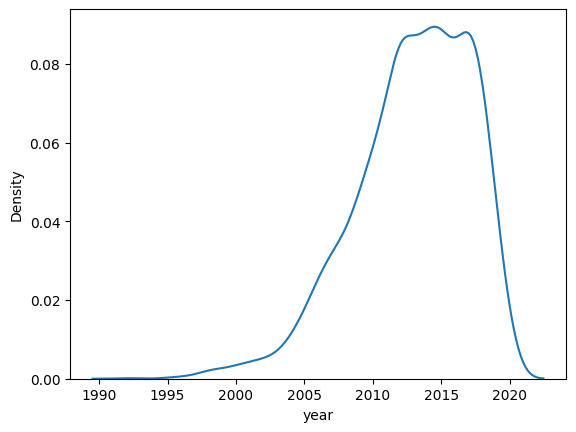

In [19]:
sns.kdeplot(df, x="year")

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
df["company"] = df['name'].str.split(" ").str[:1].str.join(" ").str.lower()
df['name'] = df['name'].str.split(" ").str[1] + " " +df['name'].str.split(" ").str[2]

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,maruti
1,Wagon R,2007,135000,50000,Petrol,Individual,Manual,First Owner,maruti
2,Verna 1.6,2012,600000,100000,Diesel,Individual,Manual,First Owner,hyundai
3,RediGO T,2017,250000,46000,Petrol,Individual,Manual,First Owner,datsun
4,Amaze VX,2014,450000,141000,Diesel,Individual,Manual,Second Owner,honda


In [23]:
df = df[df["fuel"] != "Electric"]

In [24]:
def add_others(feature_name, threshold):
    counts = df[feature_name].value_counts()
    unique = df[feature_name].nunique()

    repl = counts[counts <= threshold].index
    df[feature_name] = df[feature_name].replace(repl,'others')

In [25]:
add_others("company",50)
add_others("name",20) 

In [26]:
df["name"].value_counts()

name
others          2146
Wagon R          139
Swift Dzire      120
Alto 800          75
Grand i10         75
Innova 2.5        72
Santro Xing       57
Alto LXi          57
Verna 1.6         56
Indica Vista      56
Swift VDI         55
Alto K10          48
Alto LX           38
Figo Diesel       36
EON Era           34
Beat Diesel       32
800 AC            32
EcoSport 1.5      30
i20 Asta          28
City i            27
i10 Magna         27
Creta 1.6         27
XUV500 W8         25
Zen Estilo        25
Verna CRDi        25
Spark 1.0         25
Ecosport 1.5      25
New Safari        24
KWID RXT          24
Bolero Power      24
City 1.5          23
i20 1.2           22
Swift VXI         22
EON Magna         22
Duster 85PS       22
Name: count, dtype: int64

In [27]:
func = FunctionTransformer(func=np.log1p) 
df["selling_price"] = func.transform(df["selling_price"])

In [28]:
X = df[["name","year","km_driven","fuel","seller_type","transmission","owner","company"]]
Y = df["selling_price"]

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, random_state=42)

In [30]:
xtrain

,name,year,km_driven,fuel,seller_type,transmission,owner,company
2347,Santro Xing,2013,60000,Petrol,Individual,Manual,First Owner,hyundai
1250,others,2017,20000,Petrol,Individual,Manual,Second Owner,others
955,others,2007,60000,Petrol,Individual,Manual,Fourth & Above Owner,hyundai
2441,others,2016,90000,Diesel,Individual,Manual,Second Owner,hyundai
988,others,2018,68000,Petrol,Individual,Automatic,First Owner,others
...,...,...,...,...,...,...,...,...
1272,others,2013,40771,Petrol,Dealer,Manual,First Owner,toyota
1437,others,2012,120000,Diesel,Individual,Manual,First Owner,tata
977,Swift Dzire,2018,50000,Diesel,Individual,Manual,First Owner,maruti
4222,others,2015,70000,Diesel,Individual,Manual,Second Owner,maruti


In [31]:
encode_data  = ColumnTransformer(remainder="passthrough", transformers=[
    ("encode_data",OneHotEncoder(sparse_output=False, dtype="int32",drop="first") , [0,3,4,5,6,7])
])

In [32]:
xtrain_trf = encode_data.fit_transform(xtrain)
xtest_trf = encode_data.transform(xtest)

In [33]:
lr = LinearRegression()

# lr.fit(xtrain_trf,ytrain)
# y_pred = lr.predict(xtest_trf)

# r2_score(y_true=ytest,y_pred=y_pred)

In [34]:
# input_data = {
#     'name': ['Wagon R'],
#     'company': ['maruti'],
#     'year': [2007],
#     'km_driven': [50000],
#     'fuel': ['Petrol'],
#     'transmission': ['Manual'],
#     'owner': ['First Owner'],
#     'seller_type':"Individual"
# } 



# input_df = pd.DataFrame(input_data) 
# res = lr.predict(encode_data.transform(input_df))
# np.expm1(res)

In [35]:
pipe = Pipeline([
    ("encode_data",encode_data),
    ("model",lr)
])

In [36]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('encode_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_data',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32',
                                                                sparse_output=False),
                                                  [0, 3, 4, 5, 6, 7])])),
                ('model', LinearRegression())])

In [37]:
y_pred = pipe.predict(xtest)

print("LinearRegression R2 Score",r2_score(y_true=ytest,y_pred=y_pred))

print('MAE',mean_absolute_error(ytest,y_pred))

# input_data = {
#     'name': ['Wagon R'],
#     'company': ['maruti'],
#     'year': [2007],
#     'km_driven': [500000],
#     'fuel': ['Petrol'],
#     'transmission': ['Manual'],
#     'owner': ['First Owner'],
#     'seller_type':"Individual"
# } 



# input_df = pd.DataFrame(input_data) 
# res = pipe.predict(input_df)
# np.expm1(res)
 

LinearRegression R2 Score 0.8078621446020008
MAE 0.27702439593944667


In [38]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(xtrain,ytrain)

y_pred = pipe2.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8045933603176151
MAE 0.2806887427939374


In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

step2 = Lasso(alpha=0.0000001)

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(xtrain,ytrain)

y_pred = pipe3.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8078600425226867
MAE 0.27702642368561387


In [40]:
from sklearn.neighbors import KNeighborsRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe4.fit(xtrain,ytrain)

y_pred = pipe4.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

R2 score 0.44248367348983786
MAE 0.4615182417800481


In [41]:
from sklearn.tree import DecisionTreeRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=25)

pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe6.fit(xtrain,ytrain)

y_pred = pipe6.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.6811650423469802
MAE 0.3263797345494071


In [42]:
from sklearn.svm import SVR

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=100,epsilon=0.1)

pipe8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe8.fit(xtrain,ytrain)

y_pred = pipe8.predict(xtest)

print('R2 score',r2_score(ytest,y_pred) * 100)
print('MAE',mean_absolute_error(ytest,y_pred))


# input_data = {
#     'name': ['Wagon R'],
#     'company': ['maruti'],
#     'year': [2007],
#     'km_driven': [50000],
#     'fuel': ['Petrol'],
#     'transmission': ['Manual'],
#     'owner': ['First Owner'],
#     'seller_type':"Individual"
# } 



# input_df = pd.DataFrame(input_data) 
# res = pipe.predict(input_df)
# np.expm1(res)


R2 score 11.025306580421102
MAE 0.6037635339678746


In [46]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe8.fit(xtrain,ytrain)

y_pred = pipe8.predict(xtest)

print('R2 score',r2_score(ytest,y_pred) * 100)
print('MAE',mean_absolute_error(ytest,y_pred)) 

R2 score 83.06029299799884
MAE 0.25650506604134804


In [45]:
from sklearn.ensemble import VotingRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'), [0,3,4,5,6,7])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

ModuleNotFoundError: No module named 'xgboost'